In [1]:
import pandas as pd
import datetime

In [2]:
def import_log(filename):
    dftemp = pd.read_csv(filename, header=None)
    dftemp.columns = ['ts', 'ms', 'pipeline', 'stage', 'cid', 'notes']
    return dftemp.copy()

In [3]:
def to_unix_timestamp(dfr):
    date_format = "%Y-%m-%d %H:%M:%S"
    unix_epoch = datetime.datetime.strptime(dfr['ts'], date_format).timestamp() + float(dfr['ms']) / 1000
    return unix_epoch

In [4]:
df1 = import_log('/home/boylesa/PycharmProjects/python-nats-pipeline-exploration/logs/p1_pipeline.log')
df2 = import_log('/home/boylesa/PycharmProjects/python-nats-pipeline-exploration/logs/p2_pipeline.log')
df3 = import_log('/home/boylesa/PycharmProjects/python-nats-pipeline-exploration/logs/p3_pipeline.log')
df4 = import_log('/home/boylesa/PycharmProjects/python-nats-pipeline-exploration/logs/p4_pipeline.log')


In [5]:
df_logs = pd.concat([df1, df2, df3, df4])

In [6]:
df_logs['tsunix'] = df_logs.apply(to_unix_timestamp, axis=1)

In [7]:
pt = df_logs.pivot_table(columns=['stage'], index=['pipeline','cid'], values=['tsunix'])

In [8]:
df_summary = pd.DataFrame(pt.to_records())

In [9]:
df_summary.columns = ['pipeline', 'cid', 's0', 's1', 's2', 's3', 's4']

In [10]:
df_summary['i0'] = df_summary['s1'] - df_summary['s0']
df_summary['i1'] = df_summary['s2'] - df_summary['s1']
df_summary['i2'] = df_summary['s3'] - df_summary['s2']
df_summary['i3'] = df_summary['s4'] - df_summary['s3']
df_summary['i_total'] = df_summary['s4'] - df_summary['s0']

In [11]:
%matplotlib inline

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def pipeline_violin_plot(df, pipeline):
    fig, axes = plt.subplots()

    axes.violinplot(dataset = [df[(df['pipeline'].str.strip() == pipeline)]["i0"].values,
                               df[(df['pipeline'].str.strip() == pipeline)]["i1"].values,
                               df[(df['pipeline'].str.strip() == pipeline)]["i2"].values,
                               df[(df['pipeline'].str.strip() == pipeline)]["i3"].values,],
                   showmeans=True)

    axes.set_title(f"Pipeline Analysis - {pipeline}")
    axes.yaxis.grid(True)
    axes.set_xlabel('Stage')
    axes.set_ylabel('Stage Latencies (seconds)')

    plt.show()
    
def pipeline_comparison_violin_plot(df):
    fig, axes = plt.subplots()

    axes.violinplot(dataset = [df[(df['pipeline'].str.strip() == "p1")]["i_total"].values,
                               df[(df['pipeline'].str.strip() == "p2")]["i_total"].values,
                               df[(df['pipeline'].str.strip() == "p3")]["i_total"].values,
                               df[(df['pipeline'].str.strip() == "p4")]["i_total"].values,
                               ], 
                    showmeans=True )

    axes.set_title('Pipeline Comparison Analysis')
    axes.yaxis.grid(True)
    axes.set_xlabel('Pipeline')
    axes.set_ylabel('End to End Latencies (seconds)')

    plt.show()

In [13]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


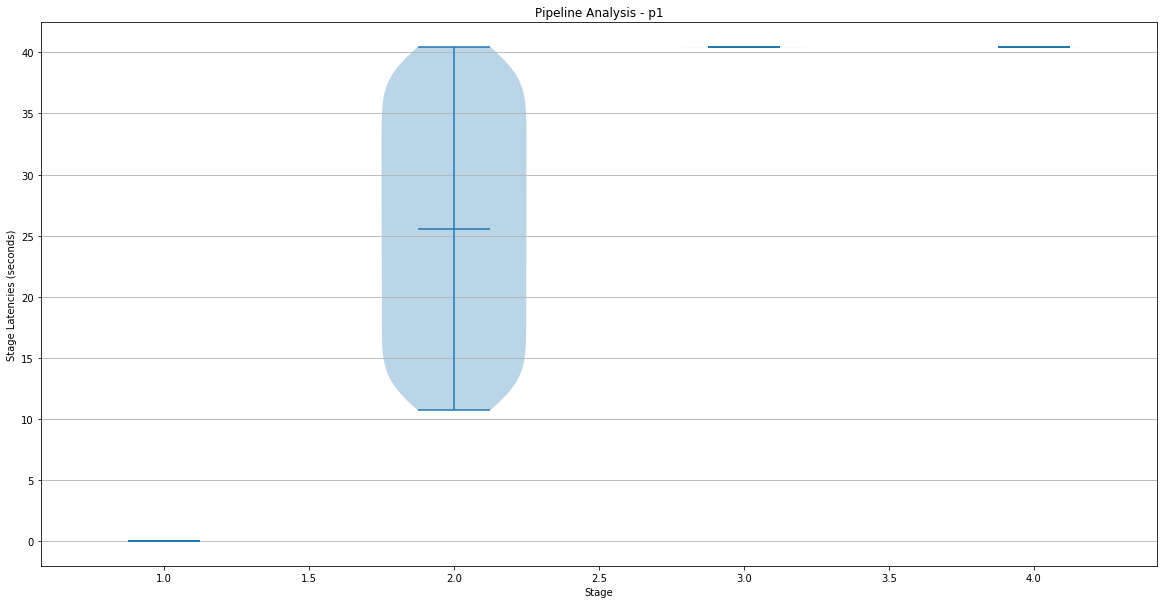

In [14]:
pipeline_violin_plot(df_summary, 'p1')

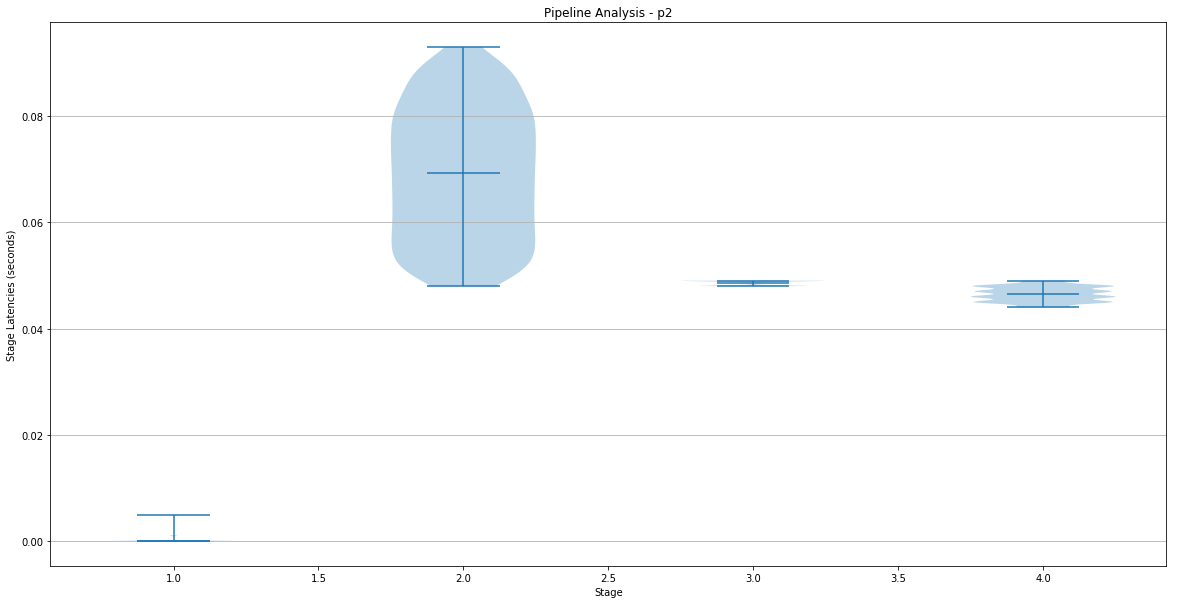

In [15]:
pipeline_violin_plot(df_summary, 'p2')

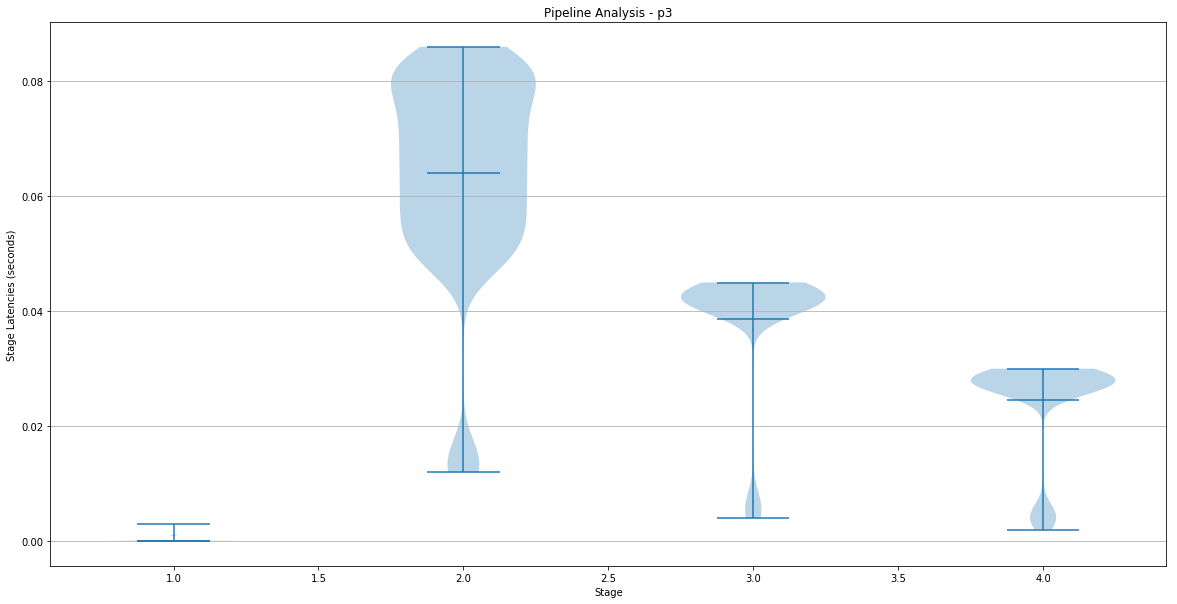

In [16]:
pipeline_violin_plot(df_summary, 'p3')

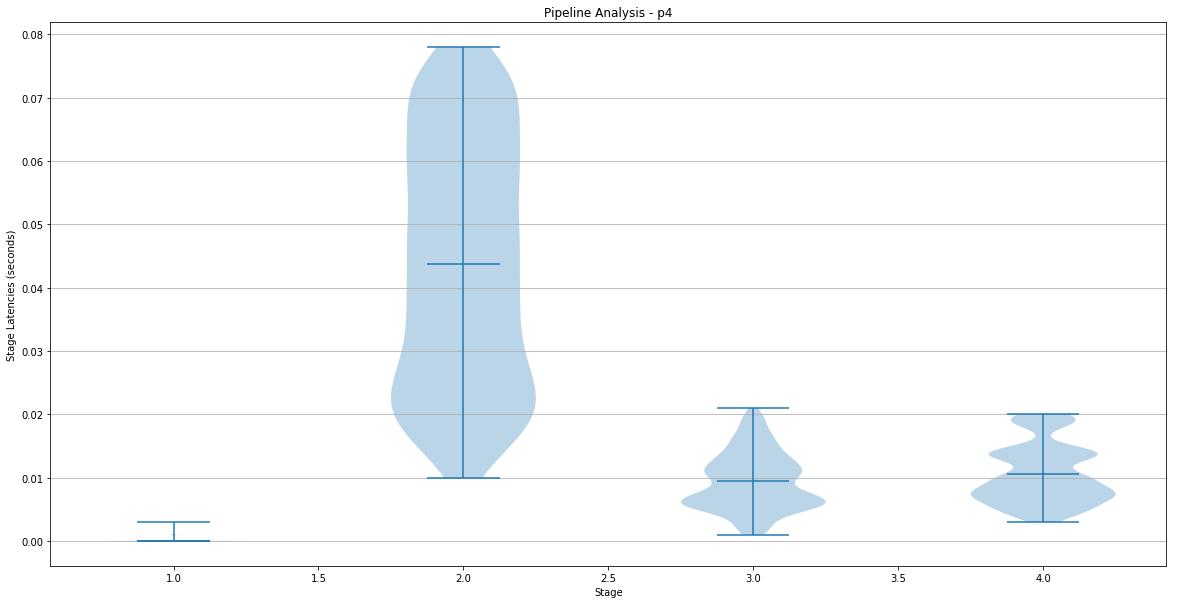

In [17]:
pipeline_violin_plot(df_summary, 'p4')

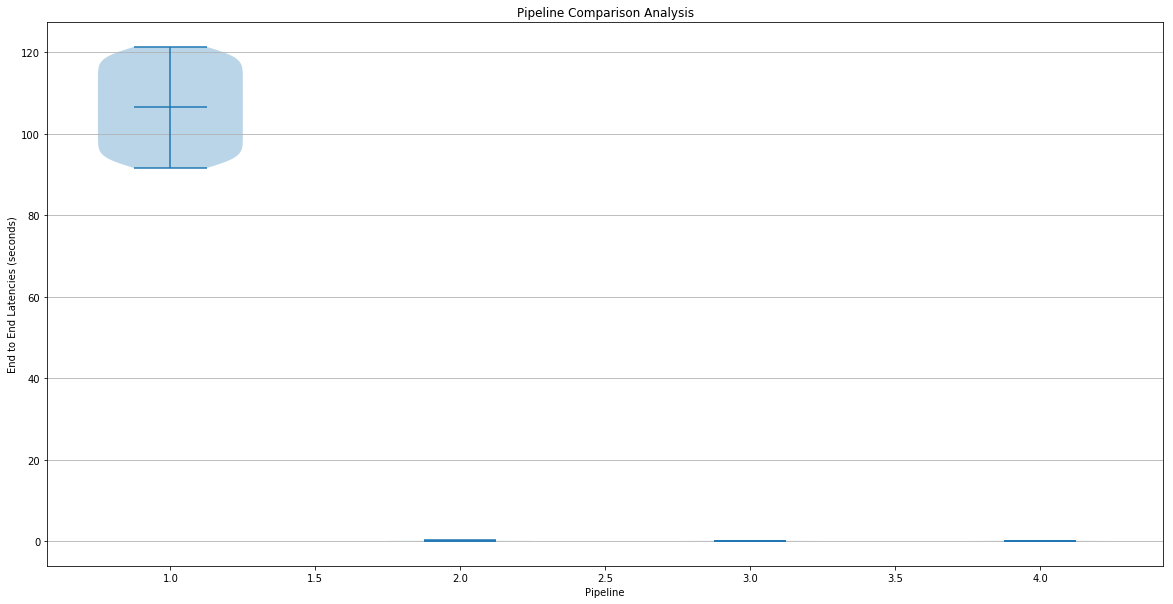

In [18]:
pipeline_comparison_violin_plot(df_summary)

In [19]:
df_summary.to_excel('summary.xlsx')